In [176]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [178]:
#turns off scientific notations
pd.options.display.float_format = '{:.2f}'.format

In [179]:
df=pd.read_csv('home_loan.csv')
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2020,549300LYRWPSYPK6S325,35004,NY,36103.00,36103201001.00,NC,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,6065,27.55,126600,90,2164,4750,36
1,2020,549300LYRWPSYPK6S325,35004,NY,36103.00,36103158402.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,4384,12.02,126600,122,1319,1479,45
2,2020,549300LYRWPSYPK6S325,35004,NY,36103.00,36103159506.00,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,8488,40.34,126600,74,1943,2911,37
3,2020,549300LYRWPSYPK6S325,15380,NY,36029.00,36029013400.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,6364,4.98,77600,142,1802,2544,61
4,2020,549300LYRWPSYPK6S325,15380,NY,36029.00,36029009007.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,7401,17.97,77600,213,2519,2759,32


In [180]:
df.shape#checking shape

(182272, 99)

In [181]:
null_val=df.isna().sum()/len(df)*100
null_val

activity_year                       0.00
lei                                 0.00
derived_msa-md                      0.00
state_code                          0.00
county_code                         0.61
                                    ... 
ffiec_msa_md_median_family_income   0.00
tract_to_msa_income_percentage      0.00
tract_owner_occupied_units          0.00
tract_one_to_four_family_homes      0.00
tract_median_age_of_housing_units   0.00
Length: 99, dtype: float64

In [182]:
null_val[null_val>0]

county_code                      0.61
census_tract                     0.74
conforming_loan_limit            0.23
loan_to_value_ratio             46.02
interest_rate                   58.07
rate_spread                     98.73
total_loan_costs                69.34
total_points_and_fees           98.73
origination_charges             67.81
discount_points                 87.68
lender_credits                  89.47
loan_term                        2.14
prepayment_penalty_term         92.80
intro_rate_period               79.42
property_value                   4.81
multifamily_affordable_units    98.68
income                          26.09
debt_to_income_ratio            45.42
applicant_ethnicity-1            0.11
applicant_ethnicity-2           97.62
applicant_ethnicity-3           99.95
applicant_ethnicity-4          100.00
applicant_ethnicity-5          100.00
co-applicant_ethnicity-1         0.02
co-applicant_ethnicity-2        99.27
co-applicant_ethnicity-3        99.98
co-applicant

*There are many columns with null values above 50%,Hence dropping those columns*

In [183]:
above_50=null_val[null_val>50].index

In [184]:
len(above_50)

34

In [185]:
df=df.drop(above_50,axis=1)

In [186]:
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2020,549300LYRWPSYPK6S325,35004,NY,36103.00,36103201001.00,NC,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,6065,27.55,126600,90,2164,4750,36
1,2020,549300LYRWPSYPK6S325,35004,NY,36103.00,36103158402.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,4384,12.02,126600,122,1319,1479,45
2,2020,549300LYRWPSYPK6S325,35004,NY,36103.00,36103159506.00,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,8488,40.34,126600,74,1943,2911,37
3,2020,549300LYRWPSYPK6S325,15380,NY,36029.00,36029013400.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,6364,4.98,77600,142,1802,2544,61
4,2020,549300LYRWPSYPK6S325,15380,NY,36029.00,36029009007.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,3,6,10,7401,17.97,77600,213,2519,2759,32


**Note: The dataset consist of redundant columns mostly named as derived columns which are generalized form of the original columns.These columns must be romoved.**

In [187]:
#these two columns represent the same field.most derived columns are gathered from original ones.
df[['applicant_race-1','derived_race']]

,applicant_race-1,derived_race
0,7.00,Race Not Available
1,7.00,Race Not Available
2,7.00,Race Not Available
3,7.00,Race Not Available
4,7.00,Race Not Available
...,...,...
182267,7.00,Race Not Available
182268,7.00,Race Not Available
182269,5.00,White
182270,5.00,White


In [188]:
df['action_taken'].value_counts()

3    107630
6     74642
Name: action_taken, dtype: int64

In [189]:
df['applicant_race-1'].nunique(),df['derived_race'].nunique()

(18, 9)

In [190]:
pd.crosstab(df['applicant_race-1'],df['derived_race'])

derived_race,2 or more minority races,American Indian or Alaska Native,Asian,Black or African American,Joint,Native Hawaiian or Other Pacific Islander,Race Not Available,White
applicant_race-1,,,,,,,,
1.00,152,625,0,0,120,0,0,0
2.00,72,0,9213,0,356,0,0,0
3.00,68,0,0,11222,285,0,0,0
4.00,4,0,0,0,24,250,0,0
5.00,11,1,108,2,864,23,0,83635
6.00,0,0,0,0,0,0,22637,0
7.00,0,0,0,0,0,0,50285,0
21.00,4,0,875,0,14,0,0,0
22.00,0,0,395,0,8,0,0,0


From the above cross_tab the values 6 is 'information not provided' and 7 is 'not applicable' but they have been categorised as the same('race not available') in the derived_race.Hence dropping derived columns.

In [191]:
df['preapproval'].value_counts()

2    182272
Name: preapproval, dtype: int64

In [192]:
df['co-applicant_ethnicity_observed'].value_counts()

4    89267
2    46247
3    44926
1     1832
Name: co-applicant_ethnicity_observed, dtype: int64

In [193]:
df['manufactured_home_secured_property_type'].value_counts(normalize=True)*100

3      96.62
2       1.35
1111    1.24
1       0.80
Name: manufactured_home_secured_property_type, dtype: float64

In [194]:
#dropping derived/unwanted/unique columns
df=df.drop(['activity_year','state_code','preapproval','derived_race','derived_ethnicity','derived_sex'
           ,'co-applicant_ethnicity_observed','applicant_ethnicity_observed','applicant_race_observed','co-applicant_race_observed','applicant_sex_observed','co-applicant_sex_observed'],axis=1)

In [195]:
df.head()

,lei,derived_msa-md,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,loan_type,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,549300LYRWPSYPK6S325,35004,36103.00,36103201001.00,NC,VA:First Lien,Single Family (1-4 Units):Site-Built,6,0,3,...,3,6,10,6065,27.55,126600,90,2164,4750,36
1,549300LYRWPSYPK6S325,35004,36103.00,36103158402.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,2,3,...,3,6,10,4384,12.02,126600,122,1319,1479,45
2,549300LYRWPSYPK6S325,35004,36103.00,36103159506.00,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,6,2,2,...,3,6,10,8488,40.34,126600,74,1943,2911,37
3,549300LYRWPSYPK6S325,15380,36029.00,36029013400.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,2,3,...,3,6,10,6364,4.98,77600,142,1802,2544,61
4,549300LYRWPSYPK6S325,15380,36029.00,36029009007.00,C,VA:First Lien,Single Family (1-4 Units):Site-Built,6,2,3,...,3,6,10,7401,17.97,77600,213,2519,2759,32


In [196]:
#derived_dwelling_category has the construction method information,can do feature extraction to drop construction method
#or assign proper labels for der_dwel_category
df[['derived_dwelling_category','construction_method']]

,derived_dwelling_category,construction_method
0,Single Family (1-4 Units):Site-Built,1
1,Single Family (1-4 Units):Site-Built,1
2,Single Family (1-4 Units):Site-Built,1
3,Single Family (1-4 Units):Site-Built,1
4,Single Family (1-4 Units):Site-Built,1
...,...,...
182267,Single Family (1-4 Units):Site-Built,1
182268,Single Family (1-4 Units):Site-Built,1
182269,Single Family (1-4 Units):Site-Built,1
182270,Single Family (1-4 Units):Site-Built,1


In [197]:
#loan_type and lien_status are derived as a single column
df[['loan_type','lien_status','derived_loan_product_type']]

,loan_type,lien_status,derived_loan_product_type
0,3,1,VA:First Lien
1,3,1,VA:First Lien
2,2,1,FHA:First Lien
3,3,1,VA:First Lien
4,3,1,VA:First Lien
...,...,...,...
182267,2,1,FHA:First Lien
182268,2,1,FHA:First Lien
182269,1,1,Conventional:First Lien
182270,1,1,Conventional:First Lien


In [198]:
#dropping these columns for now
df=df.drop(['applicant_age_above_62','derived_loan_product_type','construction_method'],axis=1)
df.head()

,lei,derived_msa-md,county_code,census_tract,conforming_loan_limit,derived_dwelling_category,action_taken,purchaser_type,loan_type,loan_purpose,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,549300LYRWPSYPK6S325,35004,36103.00,36103201001.00,NC,Single Family (1-4 Units):Site-Built,6,0,3,31,...,3,6,10,6065,27.55,126600,90,2164,4750,36
1,549300LYRWPSYPK6S325,35004,36103.00,36103158402.00,C,Single Family (1-4 Units):Site-Built,6,2,3,1,...,3,6,10,4384,12.02,126600,122,1319,1479,45
2,549300LYRWPSYPK6S325,35004,36103.00,36103159506.00,C,Single Family (1-4 Units):Site-Built,6,2,2,31,...,3,6,10,8488,40.34,126600,74,1943,2911,37
3,549300LYRWPSYPK6S325,15380,36029.00,36029013400.00,C,Single Family (1-4 Units):Site-Built,6,2,3,1,...,3,6,10,6364,4.98,77600,142,1802,2544,61
4,549300LYRWPSYPK6S325,15380,36029.00,36029009007.00,C,Single Family (1-4 Units):Site-Built,6,2,3,1,...,3,6,10,7401,17.97,77600,213,2519,2759,32


In [199]:
df.columns

Index(['lei', 'derived_msa-md', 'county_code', 'census_tract',
       'conforming_loan_limit', 'derived_dwelling_category', 'action_taken',
       'purchaser_type', 'loan_type', 'loan_purpose', 'lien_status',
       'reverse_mortgage', 'open-end_line_of_credit',
       'business_or_commercial_purpose', 'loan_amount', 'loan_to_value_ratio',
       'hoepa_status', 'loan_term', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'occupancy_type',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_units', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'co-applicant_ethnicity-1', 'applicant_race-1', 'co-applicant_race-1',
       'applicant_sex', 'co-applicant_sex', 'applicant_age',
       'co-applicant_age', 'submission_of_application',
       'initially_paya

In [200]:
num_cols=['tract_population', 'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage',
       'tract_owner_occupied_units', 'tract_one_to_four_family_homes',
       'tract_median_age_of_housing_units','loan_amount','income']
len(num_cols)

9

In [201]:
df[num_cols].dtypes

tract_population                       int64
tract_minority_population_percent    float64
ffiec_msa_md_median_family_income      int64
tract_to_msa_income_percentage         int64
tract_owner_occupied_units             int64
tract_one_to_four_family_homes         int64
tract_median_age_of_housing_units      int64
loan_amount                          float64
income                               float64
dtype: object

In [202]:
cat_cols=[]
for i in df.columns:
    if i not in num_cols:
        cat_cols.append(i)
len(cat_cols)

41

In [203]:
for i in cat_cols:
    df[i]=df[i].astype('object')

In [204]:
df[cat_cols].dtypes

lei                                         object
derived_msa-md                              object
county_code                                 object
census_tract                                object
conforming_loan_limit                       object
derived_dwelling_category                   object
action_taken                                object
purchaser_type                              object
loan_type                                   object
loan_purpose                                object
lien_status                                 object
reverse_mortgage                            object
open-end_line_of_credit                     object
business_or_commercial_purpose              object
loan_to_value_ratio                         object
hoepa_status                                object
loan_term                                   object
negative_amortization                       object
interest_only_payment                       object
balloon_payment                

**Understanding the heirarchy of columns 'derived_mas-md','county_code' and 'census_tract'**

![](https://www.census.gov/content/dam/Census/newsroom/blogs/2014/07/understanding-geographic-relationships-counties-places-tracts-and-more/geo1.jpg)

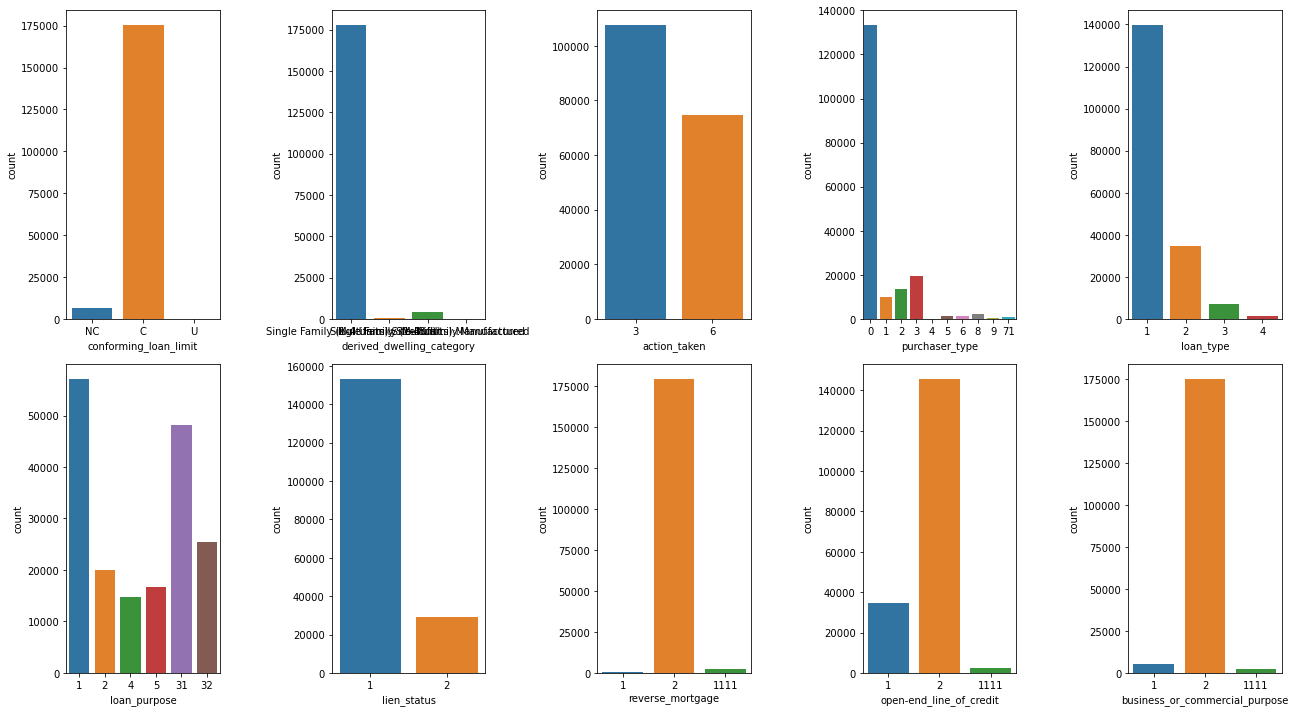

In [205]:
fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(18,10))
for var,sub in zip(cat_cols[4:14],ax.flatten()):
    sns.countplot(df[var],ax=sub)
plt.tight_layout()
plt.show()

In [206]:
df['family-dwelling_type']=df['derived_dwelling_category'].replace({'Single Family (1-4 Units):Site-Built':'SFSB',
                                                                   'Single Family (1-4 Units):Manufactured':'SFM',
                                                                   'Multifamily:Site-Built':'MFSB',
                                                                   'Multifamily:Manufactured':'MFM'})
df=df.drop('derived_dwelling_category',axis=1)

In [207]:
df['action_taken']=df['action_taken'].replace({3:'denied',6:'approved'})
df['purchaser_type']=df['purchaser_type'].replace({0:'NA',1:'Fannie Mae',2:'Ginnie Mae',3:'Freddie Mac',
                                                   4:'Farmer Mac',5:'Private securitizer',6:'Commercial bank',
                                                   71:'finance company',72:'Life insurance company',8:'Affiliate institution',
                                                   9:'Others'})
df['loan_type']=df['loan_type'].replace({1:'Conventional',2:'FHA',3:'VA',4:'RHS'})
df['loan_purpose']=df['loan_purpose'].replace({1:'Home purchase',2:'Home improvement',31:'Refinancing',32:'Cash-out refinancing',
                                               4:'Other purpose',5:'NA'})
df['lien_status']=df['lien_status'].replace({1:'FL',2:'SL'})
df['reverse_mortgage']=df['reverse_mortgage'].replace({1:'Yes',2:'No',1111:'Exempt'})
df['open-end_line_of_credit']=df['open-end_line_of_credit'].replace({1:'Yes',2:'No',1111:'Exempt'})
df['business_or_commercial_purpose']=df['business_or_commercial_purpose'].replace({1:'Yes',2:'No',1111:'Exempt'})

In [208]:
df[df['loan_to_value_ratio']!='Exempt']['loan_to_value_ratio'].astype('float').describe()

count       96075.00
mean         1284.30
std        376392.97
min             0.01
25%            51.28
50%            71.43
75%            84.23
max     116666666.67
Name: loan_to_value_ratio, dtype: float64

In [209]:
df['loan_to_value_ratio'].value_counts()

80.0       4239
Exempt     2310
80.0       1794
75.0       1558
96.5       1531
           ... 
103.037       1
84.808        1
64.051        1
75.962        1
17.143        1
Name: loan_to_value_ratio, Length: 35213, dtype: int64

In [210]:
lv_i=df[df['loan_to_value_ratio']=='Exempt'].index
df['loan_to_value_ratio']=pd.cut(df['loan_to_value_ratio'].replace({'Exempt':0}).astype('float'),bins=[0,25,50,75,100,116666668],
                      labels=['0-25%','25-50%','50-75%','75-100%','>100%']).astype('object')
for i in lv_i:
    df['loan_to_value_ratio'][i]='Exempt'
df['loan_to_value_ratio'].value_counts()

75-100%    36721
50-75%     31808
25-50%     15920
0-25%       7170
>100%       4456
Exempt      2310
Name: loan_to_value_ratio, dtype: int64

In [211]:
df['loan_term'].replace({'Exempt':0}).astype('float').describe()

count   178371.00
mean       320.78
std         80.01
min          0.00
25%        355.00
50%        360.00
75%        360.00
max        713.00
Name: loan_term, dtype: float64

In [212]:
df[df['loan_term']=='Exempt']

,lei,derived_msa-md,county_code,census_tract,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,...,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,family-dwelling_type
1021,254900AU2FARCMPNA566,15380,36029.00,36029015101.00,C,denied,NA,Conventional,Refinancing,FL,...,1111,1,3270,1.38,77600,113,1133,1425,49,SFSB
1022,254900AU2FARCMPNA566,15380,36029.00,36029011200.00,C,denied,NA,Conventional,Home purchase,FL,...,1111,3,6483,1.99,77600,110,2361,2866,41,SFM
1023,254900AU2FARCMPNA566,15380,36029.00,36029015003.00,C,denied,NA,Conventional,Home purchase,FL,...,1111,1,3403,3.17,77600,96,1187,1430,57,SFSB
1024,254900AU2FARCMPNA566,15380,36029.00,36029012003.00,C,denied,NA,Conventional,Home improvement,FL,...,1111,3,4902,3.59,77600,122,1875,2017,44,SFSB
1025,254900AU2FARCMPNA566,15380,36029.00,36029015001.00,C,denied,NA,Conventional,Other purpose,FL,...,1111,1,5345,1.01,77600,143,1877,2074,42,SFSB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171605,549300BDZCCADL2HG292,39100,36071.00,36071010101.00,C,denied,NA,Conventional,Refinancing,FL,...,1111,3,4891,22.63,100400,126,1361,1570,33,SFSB
171606,549300BDZCCADL2HG292,39100,36027.00,36027050102.00,C,denied,NA,Conventional,Cash-out refinancing,FL,...,1111,1,3823,18.18,100400,106,1193,1278,48,SFSB
171607,549300BDZCCADL2HG292,28740,36111.00,36111953300.00,C,denied,NA,Conventional,Cash-out refinancing,FL,...,1111,4,4507,15.66,83700,136,1320,1805,42,SFSB
171608,254900639EOJ1QZC2567,35004,36103.00,36103158207.00,C,denied,NA,Conventional,Refinancing,FL,...,1111,1111,4821,13.15,126600,143,1496,1703,39,SFSB


In [213]:
lt_i=df[df['loan_term']=='Exempt'].index
month=df['loan_term'].replace({'Exempt':0}).astype('float')
year=month/12
year.describe()

count   178371.00
mean        26.73
std          6.67
min          0.00
25%         29.58
50%         30.00
75%         30.00
max         59.42
Name: loan_term, dtype: float64

In [214]:
year.value_counts()

30.00    131206
15.00     15321
20.00     13413
25.00      6510
10.00      3363
          ...  
51.17         1
5.33          1
4.50          1
15.25         1
18.50         1
Name: loan_term, Length: 439, dtype: int64

In [215]:
for i in range(len(year)):
    if year[i]>0 and year[i]<10:
        year[i]='<10'
    elif year[i]>=10 and year[i]<=20:
        year[i]='10-20'
    elif year[i]>20 and year[i]<=30:
        year[i]='21-30'
    elif year[i]>30:
        year[i]='>30'
    elif year[i]==0:
        year[i]='Exempt'
year.value_counts()

21-30     139456
10-20      32524
Exempt      2310
>30         2300
<10         1781
Name: loan_term, dtype: int64

In [216]:
df['loan_term']=year

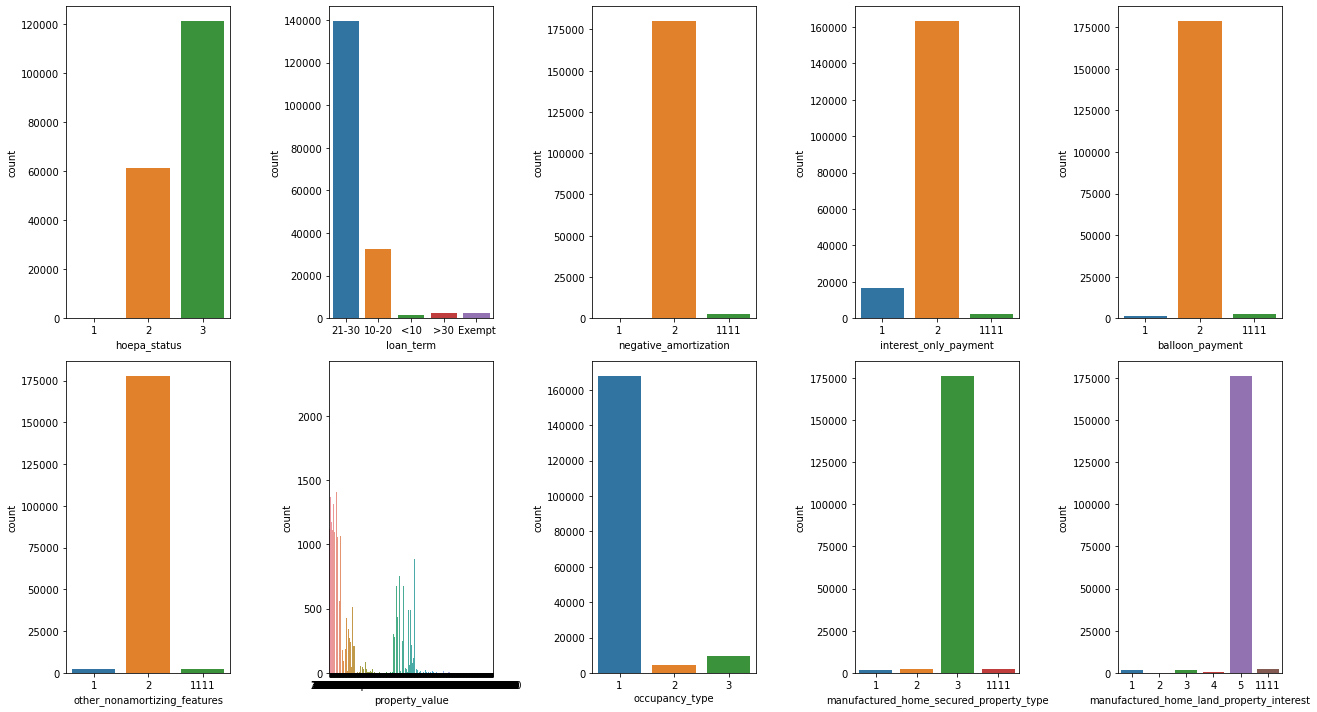

In [217]:
fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(18,10))
for var,sub in zip(cat_cols[15:25],ax.flatten()):
    sns.countplot(df[var],ax=sub)
plt.tight_layout()
plt.show()

In [218]:
#hoepa_status indicates that whether the mortgage is high_cost mortgage or not,
df['high_cost_mortgage']=df['hoepa_status'].replace({1:'Yes',2:'No',3:'NA'})
df=df.drop('hoepa_status',axis=1)
df['negative_amortization']=df['negative_amortization'].replace({1:'Yes',2:'No',1111:'Exempt'})
df['interest_only_payment']=df['interest_only_payment'].replace({1:'Yes',2:'No',1111:'Exempt'})
df['balloon_payment']=df['balloon_payment'].replace({1:'Yes',2:'No',1111:'Exempt'})
df['other_nonamortizing_features']=df['other_nonamortizing_features'].replace({1:'Yes',2:'No',1111:'Exempt'})
df['occupancy_type']=df['occupancy_type'].replace({1:'Principal residence',2:'Second residence',3:'Investment property'})

In [219]:
df[df['property_value']!='Exempt']['property_value'].astype('float')

0              NaN
1        345000.00
2        295000.00
3        235000.00
4        355000.00
            ...   
182267   505000.00
182268   435000.00
182269   655000.00
182270   535000.00
182271         NaN
Name: property_value, Length: 179962, dtype: float64

<AxesSubplot:xlabel='property_value'>

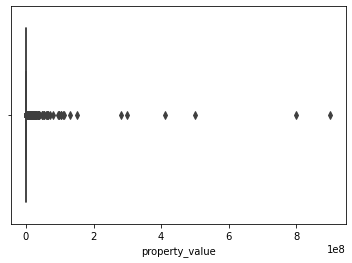

In [220]:
sns.boxplot(df[df['property_value']!='Exempt']['property_value'].astype('float'))

In [221]:
pv_i=df[df['property_value']=='Exempt'].index
df['property_value']=pd.cut(df['property_value'].replace({'Exempt':0}).astype('float'),bins=[5000,100000,500000,1000000,900006000],
                      labels=['<100K','100K-500K','500K-1M','>1M']).astype('object')
for i in pv_i:
    df['property_value'][i]='Exempt'
df['property_value'].value_counts()

100K-500K    91623
500K-1M      52493
>1M          16153
<100K        10835
Exempt        2310
Name: property_value, dtype: int64

In [222]:
df=df.drop(['manufactured_home_secured_property_type','manufactured_home_land_property_interest'],axis=1)
df.shape

(182272, 48)

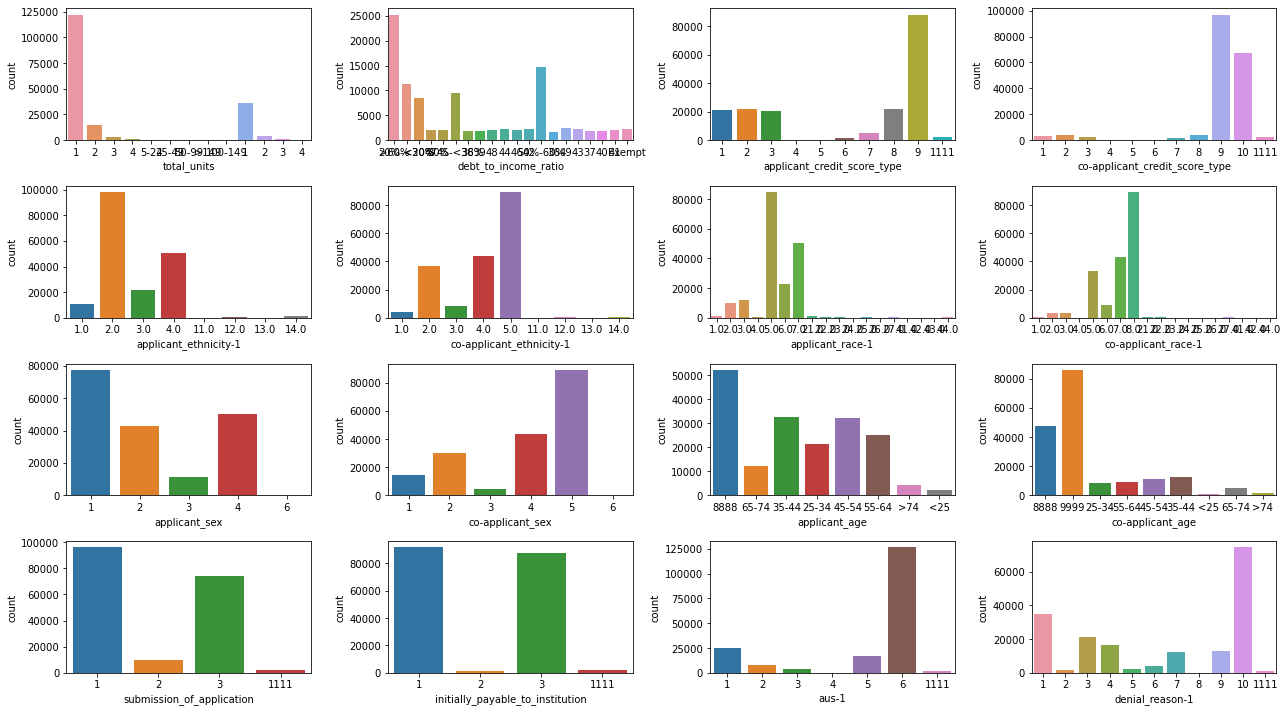

In [223]:
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(18,10))
for var,sub in zip(cat_cols[25:],ax.flatten()):
    sns.countplot(df[var],ax=sub)
plt.tight_layout()
plt.show()

In [224]:
df['applicant_credit_score_type']=df['applicant_credit_score_type'].replace({1:'EB 5.0',2:'EFI',
                                                                             3:'FICO 04',
                                                                             4:'FICO 98',5:'Vantage 2.0',
                                                                             6:'Vantage 3.0',7:'>1 scoring mode'
                                                                             ,8:'Others',9:'NA',1111:'Exempt'})
df['co-applicant_credit_score_type']=df['co-applicant_credit_score_type'].replace({1:'EB 5.0',2:'EFI',
                                                                             3:'FICO 04',
                                                                             4:'FICO 98',5:'Vantage 2.0',
                                                                             6:'Vantage 3.0',7:'>1 scoring mode'
                                                                             ,8:'Others',9:'NA',10:'No co-applicant',1111:'Exempt'})


In [225]:
df['applicant_race-1']=df['applicant_race-1'].replace({1:'American Indian',2:'Other Asian',21:'Asian Indian',22:'Chinese',23:'Filipino',
                                                       24:'Japanese',25:'Korean',26:'Vietnamese',27:'Other Asian',3:'Black',
                                                       4:'Hawaiian/Pacific',41:'Native Hawaiian',42:'Guamanian',43:'Samoan',
                                                       44:'Pacific',5:'White',6:'Not provided',7:'NA'})
df['co-applicant_race-1']=df['co-applicant_race-1'].replace({1:'American Indian',2:'Other Asian',21:'Asian Indian',22:'Chinese',23:'Filipino',
                                                       24:'Japanese',25:'Korean',26:'Vietnamese',27:'Other Asian',3:'Black',
                                                       4:'Hawaiian/Pacific',41:'Native Hawaiian',42:'Guamanian',43:'Samoan',
                                                       44:'Pacific',5:'White',6:'Not provided',7:'NA',8:'No co-applicant'})

In [226]:
df['applicant_ethnicity-1']=df['applicant_ethnicity-1'].replace({1:'Hisp or Lat',11:'Mexican',12:'Puerto Rican',13:'Cuban',
                                                                 14:'Other Hisp or Lat',2:'Not Hisp or Lat',3:'Not provided',
                                                                 4:'NA'})
df['co-applicant_ethnicity-1']=df['co-applicant_ethnicity-1'].replace({1:'Hisp or Lat',11:'Mexican',12:'Puerto Rican',13:'Cuban',
                                                                 14:'Other Hisp or Lat',2:'Not Hisp or Lat',3:'Not provided',
                                                                 4:'NA',5:'No co-applicant'})                                                                 

In [227]:
df['applicant_sex']=df['applicant_sex'].replace({1:'Male',2:'Female',3:'Not provided',4:'NA',6:'Both'})
df['co-applicant_sex']=df['co-applicant_sex'].replace({1:'Male',2:'Female',3:'Not provided',4:'NA',6:'Both',5:'No co-applicant'})
df['applicant_age']=df['applicant_age'].replace({'8888':'NA'})
df['co-applicant_age']=df['co-applicant_age'].replace({'8888':'NA','9999':'No co-applicant'})
df['submission_of_application']=df['submission_of_application'].replace({1:'Yes',2:'No',3:'NA',1111:'Exempt'})
df['initially_payable_to_institution']=df['initially_payable_to_institution'].replace({1:'Yes',2:'No',3:'NA',1111:'Exempt'})
df['aus-1']=df['aus-1'].replace({1:'DU',2:'LP',3:'TOTAL',4:'GUS',5:'Other',6:'NA',1111:'Exempt'})
df['denial_reason-1']=df['denial_reason-1'].replace({1:'Debt-to-income ratio',2:'Employment history',3:'Credit history',
                                                     4:'Collateral',5:'Insufficient cash',6:'Unverifiable information',
                                                     7:'Credit application incomplete',8:'Mortgage insurance denied',9:'Other',
                                                     10:'NA',1111:'Exempt'})

In [228]:
df['total_units'].value_counts()

1          122264
1           36149
2           14827
2            3964
3            2842
4             955
3             629
5-24          294
4             218
25-49          69
50-99          35
>149           18
100-149         8
Name: total_units, dtype: int64

In [229]:

df['total_units']=df['total_units'].replace({'1':'<5',1:'<5','2':'<5',2:'<5','3':'<5',3:'<5','4':'<5',4:'<5'})
df['total_units'].value_counts()

<5         181848
5-24          294
25-49          69
50-99          35
>149           18
100-149         8
Name: total_units, dtype: int64

In [230]:
keys=df['debt_to_income_ratio'].value_counts().index
keys=list(keys)
keys.remove('Exempt')
keys.remove('>60%')

In [231]:
keys
val='<=60'
dt={}
for i in keys:
    dt[i]=val
dt    

{'50%-60%': '<=60',
 '20%-<30%': '<=60',
 '30%-<36%': '<=60',
 '<20%': '<=60',
 '49': '<=60',
 '44': '<=60',
 '42': '<=60',
 '43': '<=60',
 '45': '<=60',
 '41': '<=60',
 '47': '<=60',
 '48': '<=60',
 '46': '<=60',
 '40': '<=60',
 '38': '<=60',
 '39': '<=60',
 '37': '<=60',
 '36': '<=60'}

In [232]:
df['debt_to_income_ratio']=df['debt_to_income_ratio'].replace(dt)

In [233]:
df.min()

lei                                   03D0JEWFDFUS0SEEKG89
derived_msa-md                                           0
county_code                                       36001.00
census_tract                                36001000100.00
action_taken                                      approved
purchaser_type                       Affiliate institution
loan_type                                     Conventional
loan_purpose                          Cash-out refinancing
lien_status                                             FL
reverse_mortgage                                    Exempt
open-end_line_of_credit                             Exempt
business_or_commercial_purpose                      Exempt
loan_amount                                        5000.00
negative_amortization                               Exempt
interest_only_payment                               Exempt
balloon_payment                                     Exempt
other_nonamortizing_features                        Exem

In [234]:
#median family income of an msa cannot be 0
df['ffiec_msa_md_median_family_income']=df['ffiec_msa_md_median_family_income'].replace({0:np.nan})

In [235]:
df=df.drop_duplicates()

In [236]:
df=df.reset_index(drop=True)

In [237]:
df.head()

,lei,derived_msa-md,county_code,census_tract,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,...,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,family-dwelling_type,high_cost_mortgage
0,549300LYRWPSYPK6S325,35004,36103.00,36103201001.00,NC,approved,NA,VA,Refinancing,FL,...,NA,6065,27.55,126600.00,90,2164,4750,36,SFSB,No
1,549300LYRWPSYPK6S325,35004,36103.00,36103158402.00,C,approved,Ginnie Mae,VA,Home purchase,FL,...,NA,4384,12.02,126600.00,122,1319,1479,45,SFSB,No
2,549300LYRWPSYPK6S325,35004,36103.00,36103159506.00,C,approved,Ginnie Mae,FHA,Refinancing,FL,...,NA,8488,40.34,126600.00,74,1943,2911,37,SFSB,No
3,549300LYRWPSYPK6S325,15380,36029.00,36029013400.00,C,approved,Ginnie Mae,VA,Home purchase,FL,...,NA,6364,4.98,77600.00,142,1802,2544,61,SFSB,No
4,549300LYRWPSYPK6S325,15380,36029.00,36029009007.00,C,approved,Ginnie Mae,VA,Home purchase,FL,...,NA,7401,17.97,77600.00,213,2519,2759,32,SFSB,No


In [238]:
revised_null=df.isna().sum()/len(df)*100

In [239]:
revised_null[revised_null>0]

county_code                          0.60
census_tract                         0.73
conforming_loan_limit                0.23
loan_to_value_ratio                 45.78
loan_term                            2.14
property_value                       4.80
income                              25.72
debt_to_income_ratio                45.18
applicant_ethnicity-1                0.11
co-applicant_ethnicity-1             0.02
applicant_race-1                     0.04
co-applicant_race-1                  0.01
ffiec_msa_md_median_family_income    0.60
dtype: float64

In [240]:
df['derived_msa-md']=df['derived_msa-md'].replace({0:df['derived_msa-md'].mode()[0]})

In [241]:
#need better understanding for filling Nans
df['income']=df['income'].fillna(df['income'].median())
df['census_tract']=df['census_tract'].fillna(df['census_tract'].mode()[0])
df['co-applicant_ethnicity-1']=df['co-applicant_ethnicity-1'].fillna(df['co-applicant_ethnicity-1'].mode()[0])
df['co-applicant_race-1']=df['co-applicant_race-1'].fillna(df['co-applicant_race-1'].mode()[0])
df['applicant_ethnicity-1']=df['applicant_ethnicity-1'].fillna(df['applicant_ethnicity-1'].mode()[0])
df['applicant_race-1']=df['applicant_race-1'].fillna(df['applicant_race-1'].mode()[0])
df['conforming_loan_limit']=df['conforming_loan_limit'].fillna(df['conforming_loan_limit'].mode()[0])
df['loan_to_value_ratio']=df['loan_to_value_ratio'].fillna(df['loan_to_value_ratio'].mode()[0])
df['loan_term']=df['loan_term'].fillna(df['loan_term'].mode()[0])
df['property_value']=df['property_value'].fillna(df['property_value'].mode()[0])
df['debt_to_income_ratio']=df['debt_to_income_ratio'].fillna(df['debt_to_income_ratio'].mode()[0])
df['ffiec_msa_md_median_family_income']=df['ffiec_msa_md_median_family_income'].fillna(df['ffiec_msa_md_median_family_income'].median())

In [242]:
df.isna().sum()

lei                                     0
derived_msa-md                          0
county_code                          1082
census_tract                            0
conforming_loan_limit                   0
action_taken                            0
purchaser_type                          0
loan_type                               0
loan_purpose                            0
lien_status                             0
reverse_mortgage                        0
open-end_line_of_credit                 0
business_or_commercial_purpose          0
loan_amount                             0
loan_to_value_ratio                     0
loan_term                               0
negative_amortization                   0
interest_only_payment                   0
balloon_payment                         0
other_nonamortizing_features            0
property_value                          0
occupancy_type                          0
total_units                             0
income                            

In [243]:
df.head()

,lei,derived_msa-md,county_code,census_tract,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,...,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,family-dwelling_type,high_cost_mortgage
0,549300LYRWPSYPK6S325,35004,36103.00,36103201001.00,NC,approved,NA,VA,Refinancing,FL,...,NA,6065,27.55,126600.00,90,2164,4750,36,SFSB,No
1,549300LYRWPSYPK6S325,35004,36103.00,36103158402.00,C,approved,Ginnie Mae,VA,Home purchase,FL,...,NA,4384,12.02,126600.00,122,1319,1479,45,SFSB,No
2,549300LYRWPSYPK6S325,35004,36103.00,36103159506.00,C,approved,Ginnie Mae,FHA,Refinancing,FL,...,NA,8488,40.34,126600.00,74,1943,2911,37,SFSB,No
3,549300LYRWPSYPK6S325,15380,36029.00,36029013400.00,C,approved,Ginnie Mae,VA,Home purchase,FL,...,NA,6364,4.98,77600.00,142,1802,2544,61,SFSB,No
4,549300LYRWPSYPK6S325,15380,36029.00,36029009007.00,C,approved,Ginnie Mae,VA,Home purchase,FL,...,NA,7401,17.97,77600.00,213,2519,2759,32,SFSB,No


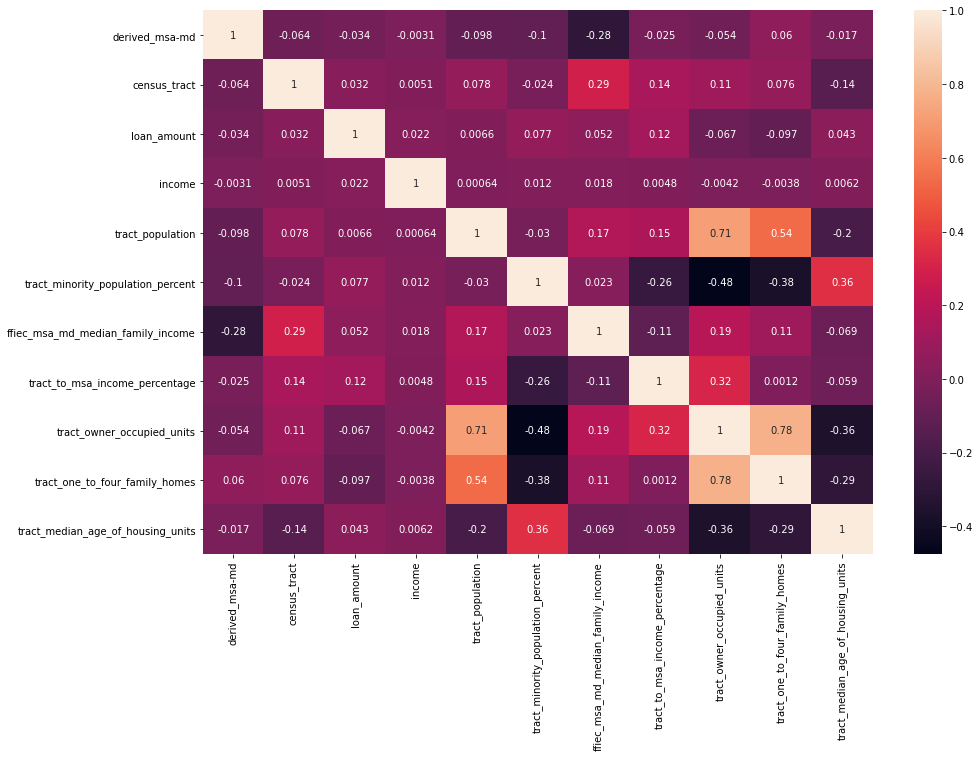

In [244]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

* Country code and census tract have a correlation of 1 which means they represent one another.
* tract one to four family homes has multicollinearity with tract population and tract owner occupies units.
* tract population also has a multicollinearity with tract owner occupies units.
* Conclusion is that tract one to four family homes, tract population and tract owner occupies units are features that are * not independent from one another. We may consider developing a new column out of the 3 or consider dropping one of them.

In [245]:
df=df.drop('county_code',axis=1)
df.shape

(181144, 47)

In [246]:
df['derived_msa-md'].value_counts()

35614    59341
35004    44606
40380    14452
15380    12896
99999    12336
10580    10692
39100     9204
45060     7375
46540     2377
13780     2155
28740     1910
24020     1617
48060     1163
21300      612
27060      408
Name: derived_msa-md, dtype: int64

In [247]:
df['derived_msa-md'].value_counts()

35614    59341
35004    44606
40380    14452
15380    12896
99999    12336
10580    10692
39100     9204
45060     7375
46540     2377
13780     2155
28740     1910
24020     1617
48060     1163
21300      612
27060      408
Name: derived_msa-md, dtype: int64

In [248]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(exclude=np.number)

In [249]:
df_num.columns

Index(['derived_msa-md', 'census_tract', 'loan_amount', 'income',
       'tract_population', 'tract_minority_population_percent',
       'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage',
       'tract_owner_occupied_units', 'tract_one_to_four_family_homes',
       'tract_median_age_of_housing_units'],
      dtype='object')

for i in df_num.columns[2:]:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=df[i].quantile(0.99)
    lc=df[i].quantile(0.01)
    for ind1 in df[i].index:
        if df.loc[ind1,i]>ub:
            df.loc[ind1,i]=uc
        if df.loc[ind1,i]<lb:
            df.loc[ind1,i]=lc

for i in df_num.columns[2:]:
    sns.boxplot(df[i])
    plt.show()

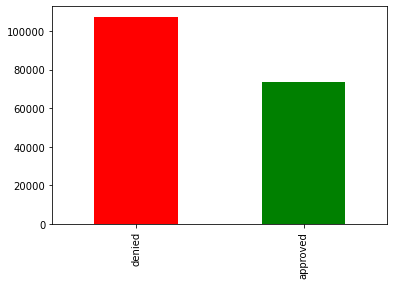

In [250]:
(df['action_taken'].value_counts()).plot(kind='bar', color=['red','green'])
plt.show()

- 'Approved' is the minority class.
- The difference is not alarming and there is no need for treatment of class imbalance.

In [251]:
df.head()

,lei,derived_msa-md,census_tract,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,reverse_mortgage,...,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,family-dwelling_type,high_cost_mortgage
0,549300LYRWPSYPK6S325,35004,36103201001.00,NC,approved,NA,VA,Refinancing,FL,No,...,NA,6065,27.55,126600.00,90,2164,4750,36,SFSB,No
1,549300LYRWPSYPK6S325,35004,36103158402.00,C,approved,Ginnie Mae,VA,Home purchase,FL,No,...,NA,4384,12.02,126600.00,122,1319,1479,45,SFSB,No
2,549300LYRWPSYPK6S325,35004,36103159506.00,C,approved,Ginnie Mae,FHA,Refinancing,FL,No,...,NA,8488,40.34,126600.00,74,1943,2911,37,SFSB,No
3,549300LYRWPSYPK6S325,15380,36029013400.00,C,approved,Ginnie Mae,VA,Home purchase,FL,No,...,NA,6364,4.98,77600.00,142,1802,2544,61,SFSB,No
4,549300LYRWPSYPK6S325,15380,36029009007.00,C,approved,Ginnie Mae,VA,Home purchase,FL,No,...,NA,7401,17.97,77600.00,213,2519,2759,32,SFSB,No


In [252]:
cat_cols=df_cat.columns
s=list(cat_cols)
s.append(df_num.columns[0])
s.append(df_num.columns[1])

In [253]:
s.remove('action_taken')

In [254]:
df1=df.copy(deep=True)

In [255]:
for i in s:
    tab=df1[i].value_counts(normalize=True)*100
    df1[i]=df1[i].map(tab)
df1

,lei,derived_msa-md,census_tract,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,reverse_mortgage,...,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,family-dwelling_type,high_cost_mortgage
0,0.88,24.62,0.09,3.51,approved,73.10,3.79,26.56,83.98,98.40,...,40.59,6065,27.55,126600.00,90,2164,4750,36,97.63,33.47
1,0.88,24.62,0.05,96.44,approved,7.40,3.79,31.33,83.98,98.40,...,40.59,4384,12.02,126600.00,122,1319,1479,45,97.63,33.47
2,0.88,24.62,0.11,96.44,approved,7.40,18.67,26.56,83.98,98.40,...,40.59,8488,40.34,126600.00,74,1943,2911,37,97.63,33.47
3,0.88,7.12,0.05,96.44,approved,7.40,3.79,31.33,83.98,98.40,...,40.59,6364,4.98,77600.00,142,1802,2544,61,97.63,33.47
4,0.88,7.12,0.06,96.44,approved,7.40,3.79,31.33,83.98,98.40,...,40.59,7401,17.97,77600.00,213,2519,2759,32,97.63,33.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181139,0.88,24.62,0.04,96.44,approved,73.10,18.67,31.33,83.98,98.40,...,40.59,3270,15.57,126600.00,100,933,1289,62,97.63,33.47
181140,0.88,24.62,0.04,96.44,approved,7.40,18.67,31.33,83.98,98.40,...,40.59,3772,28.08,126600.00,87,888,1103,60,97.63,33.47
181141,0.88,24.62,0.05,96.44,denied,73.10,76.91,26.56,83.98,98.40,...,19.18,6217,29.84,126600.00,104,1575,1953,76,97.63,66.53
181142,0.88,24.62,0.05,96.44,denied,73.10,76.91,31.33,83.98,98.40,...,11.86,6268,35.11,126600.00,93,1710,1986,61,97.63,66.53


In [256]:
df1['action_taken']=df1['action_taken'].replace({'approved':1,'denied':0})
df1.head()

,lei,derived_msa-md,census_tract,conforming_loan_limit,action_taken,purchaser_type,loan_type,loan_purpose,lien_status,reverse_mortgage,...,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,family-dwelling_type,high_cost_mortgage
0,0.88,24.62,0.09,3.51,1,73.10,3.79,26.56,83.98,98.40,...,40.59,6065,27.55,126600.00,90,2164,4750,36,97.63,33.47
1,0.88,24.62,0.05,96.44,1,7.40,3.79,31.33,83.98,98.40,...,40.59,4384,12.02,126600.00,122,1319,1479,45,97.63,33.47
2,0.88,24.62,0.11,96.44,1,7.40,18.67,26.56,83.98,98.40,...,40.59,8488,40.34,126600.00,74,1943,2911,37,97.63,33.47
3,0.88,7.12,0.05,96.44,1,7.40,3.79,31.33,83.98,98.40,...,40.59,6364,4.98,77600.00,142,1802,2544,61,97.63,33.47
4,0.88,7.12,0.06,96.44,1,7.40,3.79,31.33,83.98,98.40,...,40.59,7401,17.97,77600.00,213,2519,2759,32,97.63,33.47


In [257]:
df1['action_taken'].value_counts()

0    107414
1     73730
Name: action_taken, dtype: int64

In [258]:
df1['income'].value_counts()

95.00        47637
0.00          2045
60.00         1515
100.00        1434
80.00         1250
             ...  
-53.00           1
979.00           1
78622.00         1
259356.00        1
134941.00        1
Name: income, Length: 2694, dtype: int64

<AxesSubplot:xlabel='income'>

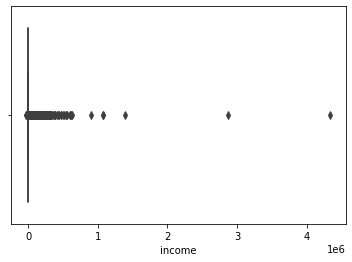

In [259]:
sns.boxplot(df['income'])

In [260]:
from sklearn.preprocessing import StandardScaler

In [261]:
#the below columns wouldn't be suitable for deploying model,hence dropping these columns
x=df1.drop(['aus-1','co-applicant_credit_score_type','applicant_credit_score_type','action_taken','denial_reason-1'],axis=1)
y=df1['action_taken']

In [262]:
ss=StandardScaler()
x_scaled=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x_scaled.head()

,lei,derived_msa-md,census_tract,conforming_loan_limit,purchaser_type,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,...,initially_payable_to_institution,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,family-dwelling_type,high_cost_mortgage
0,-0.67,0.44,0.60,-5.20,0.61,-2.27,0.55,0.44,0.13,0.50,...,-0.06,0.71,-0.16,1.63,-0.47,1.62,4.12,-1.13,0.16,-1.41
1,-0.67,0.44,0.06,0.19,-1.65,-2.27,1.06,0.44,0.13,0.50,...,-0.06,-0.18,-0.67,1.63,0.16,0.23,-0.11,-0.56,0.16,-1.41
2,-0.67,0.44,0.82,0.19,-1.65,-1.70,0.55,0.44,0.13,0.50,...,-0.06,1.99,0.26,1.63,-0.79,1.26,1.75,-1.06,0.16,-1.41
3,-0.67,-1.00,0.13,0.19,-1.65,-2.27,1.06,0.44,0.13,0.50,...,-0.06,0.86,-0.90,-0.71,0.55,1.02,1.27,0.45,0.16,-1.41
4,-0.67,-1.00,0.22,0.19,-1.65,-2.27,1.06,0.44,0.13,0.50,...,-0.06,1.41,-0.47,-0.71,1.94,2.20,1.55,-1.38,0.16,-1.41


In [263]:
from sklearn.model_selection import train_test_split,cross_val_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [264]:
x_const=sm.add_constant(x_scaled)
x_train,x_test,y_train,y_test=train_test_split(x_const,y,test_size=0.3,stratify=y)

In [265]:
base_model=sm.Logit(y_train,x_train).fit()
base_model.summary()

         Current function value: 0.013344
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           action_taken   No. Observations:               126800
Model:                          Logit   Df Residuals:                   126757
Method:                           MLE   Df Model:                           42
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                  0.9803
Time:                        12:20:43   Log-Likelihood:                -1692.1
converged:                      False   LL-Null:                       -85686.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                21.3317   1.47e+06   1.45e-05      1.000   -2.89e+06    2.89e+06
lei                                   0.8171      0.049     16.756      0.000       0.722       0.913
derived_msa-md                        0.2461      0.078      3.163      0.002       0.094       0.399
census_tract                          0.0132      0.052      0.252      0.801      -0.089       0.116
conforming_loan_limit                 0.2938      0.065      4.542      0.000       0.167       0.421
purchaser_type                      -23.3821   2.45e+06  -9.55e-06      1.000    -4.8e+06     4.8e+06
loan_type                            -0.3489      0.058     -6.045      0.000      -0.462      -0.236
loan_purpose                         -0.2717      0.059     -4.595      0.000      -0.388      -0.156
lien_status                           0.2206      0.121      1.820      0.069      -0.017       0.458
reverse_mortgage                     -0.7215      0.136     -5.292      0.000      -0.989      -0.454
open-end_line_of_credit               1.5759      0.303      5.195      0.000       0.981       2.170
business_or_commercial_purpose        0.7529      0.045     16.697      0.000       0.664       0.841
loan_amount                          -0.2549      0.140     -1.819      0.069      -0.530       0.020
loan_to_value_ratio                   4.1074      0.600      6.840      0.000       2.930       5.284
loan_term                             0.0206      0.061      0.340      0.734      -0.098       0.139
negative_amortization                -1.6431      0.201     -8.171      0.000      -2.037      -1.249
interest_only_payment                 0.3993      0.142      2.803      0.005       0.120       0.678
balloon_payment                       0.1563      0.062      2.536      0.011       0.036       0.277
other_nonamortizing_features         -0.1624      0.146     -1.110      0.267      -0.449       0.124
property_value                       -0.3389      0.058     -5.866      0.000      -0.452      -0.226
occupancy_type                       -0.6918      0.042    -16.352      0.000      -0.775      -0.609
total_units                           0.0229      0.031      0.742      0.458      -0.038       0.083
income                                4.5337      0.241     18.827      0.000       4.062       5.006
debt_to_income_ratio                  1.7423      0.333      5.225      0.000       1.089       2.396
applicant_ethnicity-1                 0.0556      0.070      0.797      0.425      -0.081       0.192
co-applicant_ethnicity-1             -0.7429      0.194     -3.824      0.000      -1.124      -0.362
applicant_race-1                     -0.1346      0.068     -1.987      0.047      -0.267      -0.002
co-applicant_race-1                   0.6028      0.212      2.837      0.005       0.186       1.019
applicant_sex                         0.0603      0.064      0.943      0.346  

In [266]:
bas_pred=base_model.predict(x_test)
base_pred=[1 if x>0.5 else 0 for x in bas_pred]
accuracy_score(y_test,base_pred)

0.9974054173413809

In [267]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
lr_model=lr.fit(x_train,y_train)

In [268]:
lr_model.score(x_test,y_test)

0.9973134108641248

In [269]:
coef=pd.DataFrame({'feat':x_train.columns,'coef':lr_model.coef_[0]})
coef['ODD']=np.exp(coef['coef'])
coef.sort_values('coef',ascending=False)

,feat,coef,ODD
22,income,4.13,62.12
30,applicant_age,3.77,43.38
13,loan_to_value_ratio,3.34,28.19
23,debt_to_income_ratio,1.58,4.84
10,open-end_line_of_credit,1.29,3.62
0,const,1.00,2.71
1,lei,0.82,2.27
11,business_or_commercial_purpose,0.69,1.99
27,co-applicant_race-1,0.50,1.65
16,interest_only_payment,0.33,1.39


## Cross validating Random forest model

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,stratify=y)

In [271]:
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)

In [272]:
rf_model.score(x_test,y_test)

0.9999447961136464

In [273]:
rf_pred=rf_model.predict(x_test)
accuracy_score(y_test,rf_pred)

0.9999447961136464

In [275]:
score=cross_val_score(rf,x_train,y_train,cv=5,scoring='roc_auc')
print('bias error', 1-np.mean(score))
print('variance error',np.std(score)/np.mean(score))

bias error 8.310555388302276e-08
variance error 7.408308956107719e-08


## trying with other models

In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [279]:
clf1=LogisticRegression(solver='liblinear')
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier()
clf5=GaussianNB()
clf6=GradientBoostingClassifier()
clf7=XGBClassifier()

In [280]:
from sklearn.model_selection import cross_val_score
mod=[clf1,clf2,clf3,clf5,clf6,clf7]
mod_name=['Logreg','DT','RF','GaussNB','GradBoost','XGB']
for  i ,j in zip(mod,mod_name):
    model=i.fit(x_train,y_train)
    print(j,'train:',model.score(x_train,y_train))
    print(j,'test:',model.score(x_test,y_test))

Logreg train: 0.9974763406940063
Logreg test: 0.9974606212277344
DT train: 1.0
DT test: 0.9999815987045488
RF train: 1.0
RF test: 0.999907993522744
GaussNB train: 0.9928391167192429
GaussNB test: 0.9930075077285441
GradBoost train: 0.9999211356466877
GradBoost test: 0.9998527896363903
[12:22:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB train: 1.0
XGB test: 1.0


## using significant columns from logit model

In [281]:
pval=base_model.pvalues
sig_cols=pval[pval<0.05].index

In [282]:

x_sig=x[sig_cols]
x_sig.head()

,lei,derived_msa-md,conforming_loan_limit,loan_type,loan_purpose,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_to_value_ratio,negative_amortization,...,income,debt_to_income_ratio,co-applicant_ethnicity-1,applicant_race-1,co-applicant_race-1,applicant_age,submission_of_application,tract_minority_population_percent,ffiec_msa_md_median_family_income,family-dwelling_type
0,0.88,24.62,3.51,3.79,26.56,98.40,79.76,95.95,66.03,98.74,...,95.00,84.83,23.54,27.24,23.53,28.29,40.48,27.55,126600.00,97.63
1,0.88,24.62,96.44,3.79,31.33,98.40,79.76,95.95,66.03,98.74,...,95.00,84.83,23.54,27.24,23.53,28.29,40.48,12.02,126600.00,97.63
2,0.88,24.62,96.44,18.67,26.56,98.40,79.76,95.95,66.03,98.74,...,95.00,84.83,23.54,27.24,23.53,28.29,40.48,40.34,126600.00,97.63
3,0.88,7.12,96.44,3.79,31.33,98.40,79.76,95.95,66.03,98.74,...,95.00,84.83,23.54,27.24,23.53,28.29,40.48,4.98,77600.00,97.63
4,0.88,7.12,96.44,3.79,31.33,98.40,79.76,95.95,66.03,98.74,...,95.00,84.83,23.54,27.24,23.53,28.29,40.48,17.97,77600.00,97.63


In [283]:
x_train,x_test,y_train,y_test=train_test_split(x_sig,y,test_size=0.3,stratify=y)

In [284]:
from sklearn.model_selection import cross_val_score
mod=[clf1,clf2,clf3,clf5,clf6,clf7]
mod_name=['LogReg','DT','RF','GaussNB','GradBoost','XGB']
for  i ,j in zip(mod,mod_name):
    model=i.fit(x_train,y_train)
    print(j,'train:',model.score(x_train,y_train))
    print(j,'test:',model.score(x_test,y_test))

LogReg train: 0.9112854889589905
LogReg test: 0.9103488885617548
DT train: 1.0
DT test: 0.9999263948181952
RF train: 1.0
RF test: 0.9999263948181952
GaussNB train: 0.9568927444794952
GaussNB test: 0.9564625349624614
GradBoost train: 0.9999605678233439
GradBoost test: 0.9999447961136464
[12:23:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB train: 1.0
XGB test: 0.9999815987045488


## Performing feature selection

In [285]:
from sklearn.feature_selection import RFE

In [286]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,stratify=y)

In [287]:
rfe=RFE(rf,n_features_to_select=15)
rfe_model=rfe.fit(x,y)

In [288]:
feat=pd.Series(rfe_model.ranking_,index=x.columns)
rfe_feat=feat[feat==1].index

In [289]:
rfe_feat

Index(['lei', 'purchaser_type', 'loan_type', 'loan_purpose',
       'open-end_line_of_credit', 'loan_to_value_ratio', 'income',
       'applicant_ethnicity-1', 'co-applicant_ethnicity-1',
       'co-applicant_race-1', 'applicant_age', 'co-applicant_age',
       'submission_of_application', 'initially_payable_to_institution',
       'high_cost_mortgage'],
      dtype='object')

In [290]:
x_rfe=x[rfe_feat]
x_rfe.head()

,lei,purchaser_type,loan_type,loan_purpose,open-end_line_of_credit,loan_to_value_ratio,income,applicant_ethnicity-1,co-applicant_ethnicity-1,co-applicant_race-1,applicant_age,co-applicant_age,submission_of_application,initially_payable_to_institution,high_cost_mortgage
0,0.88,73.10,3.79,26.56,79.76,66.03,95.00,27.24,23.54,23.53,28.29,25.89,40.48,47.60,33.47
1,0.88,7.40,3.79,31.33,79.76,66.03,95.00,27.24,23.54,23.53,28.29,25.89,40.48,47.60,33.47
2,0.88,7.40,18.67,26.56,79.76,66.03,95.00,27.24,23.54,23.53,28.29,25.89,40.48,47.60,33.47
3,0.88,7.40,3.79,31.33,79.76,66.03,95.00,27.24,23.54,23.53,28.29,25.89,40.48,47.60,33.47
4,0.88,7.40,3.79,31.33,79.76,66.03,95.00,27.24,23.54,23.53,28.29,25.89,40.48,47.60,33.47


In [291]:
x_train,x_test,y_train,y_test=train_test_split(x_rfe,y,test_size=0.3,stratify=y)

In [292]:
mod=[clf1,clf2,clf3,clf5,clf6,clf7]
mod_name=['Logreg','DT','RF','GaussNB','GradBoost','XGB']
for  i ,j in zip(mod,mod_name):
    model=i.fit(x_train,y_train)
    print(j,'train:',model.score(x_train,y_train))
    print(j,'test:',model.score(x_test,y_test))

Logreg train: 0.9909542586750789
Logreg test: 0.9910937730016193
DT train: 1.0
DT test: 0.9999447961136464
RF train: 1.0
RF test: 0.9999447961136464
GaussNB train: 0.9925236593059937
GaussNB test: 0.9927866921831296
GradBoost train: 0.9999605678233439
GradBoost test: 0.9999631974090976
[12:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB train: 1.0
XGB test: 0.9999631974090976


**Performing PCA**

In [325]:
from sklearn.decomposition import PCA
pc=PCA(n_components=0.90)

In [326]:
pcs=pc.fit_transform(x_scaled)

In [327]:
pcs=pd.DataFrame(pcs)

In [328]:
pcs.shape

(181144, 26)

In [329]:
x_train,x_test,y_train,y_test=train_test_split(pcs,y,test_size=0.3,stratify=y)

In [330]:
mod=[clf1,clf2,clf3,clf5,clf6,clf7]
mod_name=['Logreg','DT','RF','GaussNB','GradBoost','XGB']
for  i ,j in zip(mod,mod_name):
    model=i.fit(x_train,y_train)
    print(j,'train:',model.score(x_train,y_train))
    print(j,'test:',model.score(x_test,y_test))

Logreg train: 0.9963249211356466
Logreg test: 0.9959517150007361
DT train: 1.0
DT test: 0.986640659502429
RF train: 1.0
RF test: 0.9952524657735905
GaussNB train: 0.9287933753943217
GaussNB test: 0.9285477697629914
GradBoost train: 0.9914195583596215
GradBoost test: 0.9899344913881938
[12:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB train: 1.0
XGB test: 0.9981782717503312


* Applying PCA with 90% of variation factor has reduced the feature size to 26 components.
* Only for GuassNb the accuracy has reduced to 7%(apprx),rest of the models are still providing the same accuracy scores.

## finding the best model for rfe features using cross validation

In [299]:
mod=[clf1,clf2,clf3,clf5,clf6,clf7]
mod_name=['Logreg','DT','RF','GaussNB','GradBoost','XGB']
for  i ,j in zip(mod,mod_name):
    score=cross_val_score(i,x_rfe,y,cv=5)
    print(j,'- bias error :', 1-np.mean(score))
    print(j,'- variance error :',np.std(score)/np.mean(score))

Logreg - bias error : 0.022330219996276823
Logreg - variance error : 0.016449139579585347
DT - bias error : 0.043926137587130265
DT - variance error : 0.09047542135117939
RF - bias error : 0.0003201854867647125
RF - variance error : 0.00033160844888927005
GaussNB - bias error : 0.012233381846092017
GaussNB - variance error : 0.008714897651212776
GradBoost - bias error : 0.00020977669822530576
GradBoost - variance error : 0.0003428729910221199
[12:29:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Exp

Both the bias and variance error have achieved least values in Random Forest,Hence Random Forest is our final best  model.

## Random forest with rfe features

In [300]:
from sklearn.metrics import roc_curve,roc_auc_score

In [301]:
x_train,x_test,y_train,y_test=train_test_split(x_rfe,y,test_size=0.3,stratify=y,random_state=30)

In [302]:
rf=RandomForestClassifier()

In [303]:
#fitting the train data
rf_model=rf.fit(x_train,y_train)

In [304]:
#finding prediction and probability for evaluation
fin_pred=rf_model.predict(x_test)
fin_prob=rf_model.predict_proba(x_test)

In [305]:
accuracy_score(y_test,fin_pred)

0.9999263948181952

## Evaluating the model

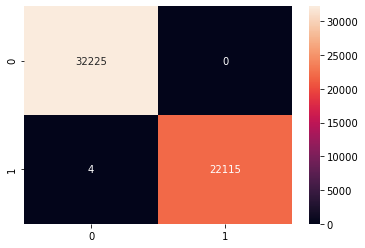

In [306]:
cfm=confusion_matrix(y_test,fin_pred)
sns.heatmap(cfm,annot=True,fmt='d')
plt.show()

In [307]:
print(classification_report(y_test,fin_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32225
           1       1.00      1.00      1.00     22119

    accuracy                           1.00     54344
   macro avg       1.00      1.00      1.00     54344
weighted avg       1.00      1.00      1.00     54344



In [308]:
fpr,tpr,th=roc_curve(y_test,fin_prob[:,1])

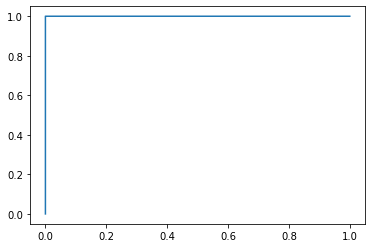

In [309]:
plt.plot(fpr,tpr)
plt.show()

In [310]:
roc_auc_score(y_test,fin_prob[:,1])

0.999999995791156